In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [43]:
raw_data = pd.read_csv("../data/raw/filtered.tsv", sep="\t", index_col=0)

#### From the data exploration we understood that there is no sense in keeping the sentences with medium level of toxicity, so I will exclude this data from the dataset.

In [44]:
raw_data.drop(raw_data[(raw_data['ref_tox'] >= 0.2) & (raw_data['ref_tox'] <= 0.8)].index, inplace=True)

#### And also, I will drop the data where the toxicity of translation is higher than 0.4 because there is no sense in keeping detoxified sentences that are toxic.

In [45]:
raw_data.drop(raw_data[(raw_data['trn_tox'] >= 0.4)].index, inplace=True)

In [46]:
raw_data = raw_data[:200000]

In [47]:
raw_data.shape

(200000, 6)

[]

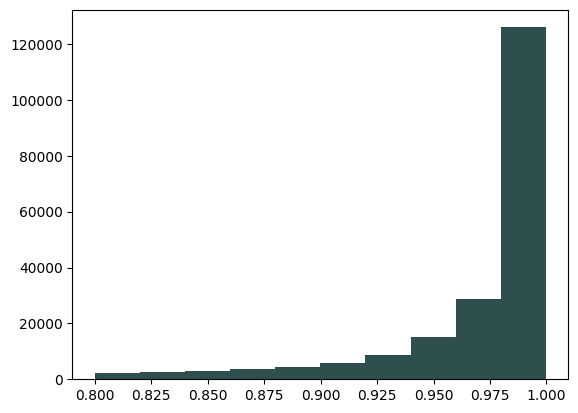

In [48]:
plt.hist(raw_data.ref_tox, color="darkslategray")
plt.plot()

[]

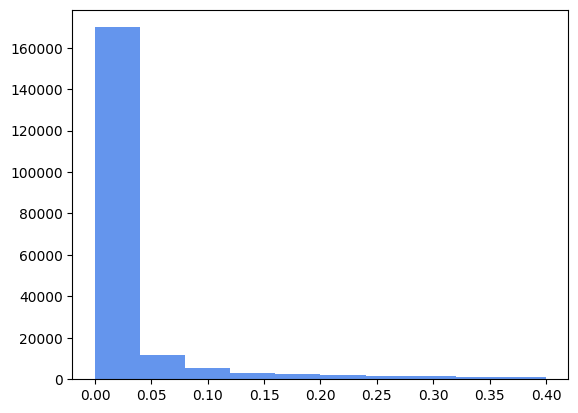

In [49]:
plt.hist(raw_data.trn_tox, color="cornflowerblue")
plt.plot()

#### Split the data into train test

In [50]:
train, test = train_test_split(raw_data, test_size=0.2)

In [51]:
print(train.shape, test.shape)

(160000, 6) (40000, 6)


In [52]:
print(train.ref_tox.mean(), train.trn_tox.mean())
print(test.ref_tox.mean(), test.trn_tox.mean())

0.9718654721710831 0.025191602609572764
0.9718754362866282 0.025274302608989694


In [53]:
def drop_columns(df):
    # df = pd.DataFrame(df)
    df.drop(df.loc[:, 'similarity':'trn_tox'].columns, axis=1, inplace=True)
    return df

train = drop_columns(train)
test = drop_columns(test)

In [54]:
# save the dataframes to csv files
train.to_csv("../data/interim/train.csv")
test.to_csv("../data/interim/test.csv")